In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, fbeta_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import time

In [ ]:
# Dataset source: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [ ]:
diabetes_df = pd.read_csv("diabetes_prediction_dataset.csv")
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Data Exploration Steps to Do:

1. Check for any null values
2. Create data visualizations (histograms, box plots, bar graphs, etc.) to investigate distributions of the data


*   Overall Distribution of Data
*   Distribution of Data for Diabetics
*   Distribution of Data for Non-Diabetics

3. Create data visualization of people who have heart diesease of diabetes vs no diabetes





In [ ]:
diabetes_df.isna().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

Text(0, 0.5, 'Frequency')

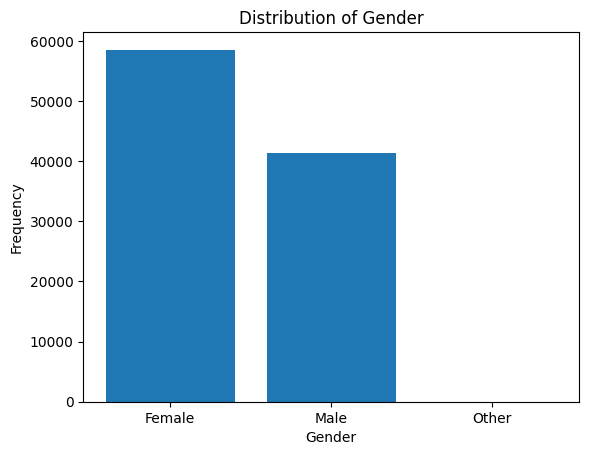

In [ ]:
gender_group = diabetes_df.groupby(['gender'])['heart_disease'].count()
plt.bar(gender_group.index, list(gender_group))
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

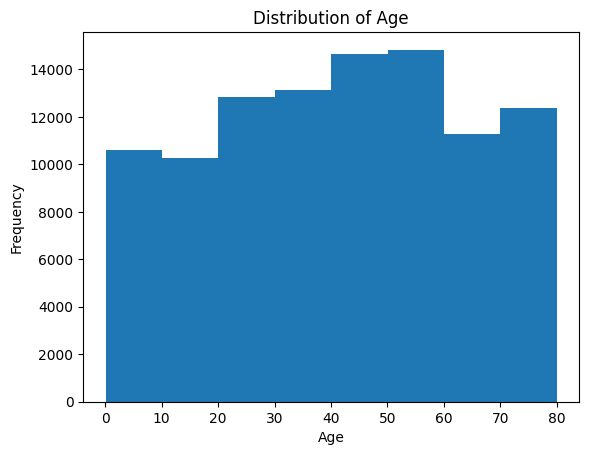

In [ ]:
plt.hist(diabetes_df['age'], bins=8)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 0, 'Age')

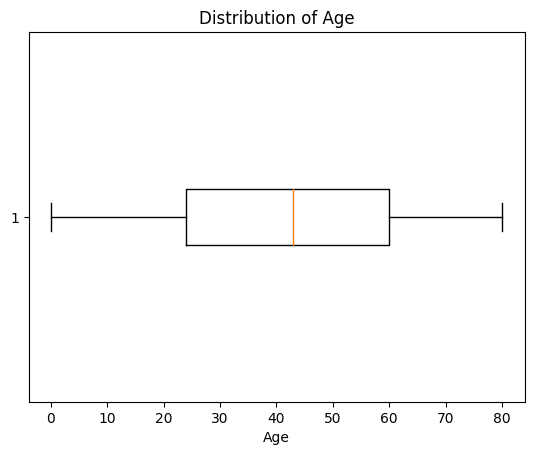

In [ ]:
plt.boxplot(diabetes_df['age'], vert=False)
plt.title('Distribution of Age')
plt.xlabel('Age')

Text(0, 0.5, 'Frequency')

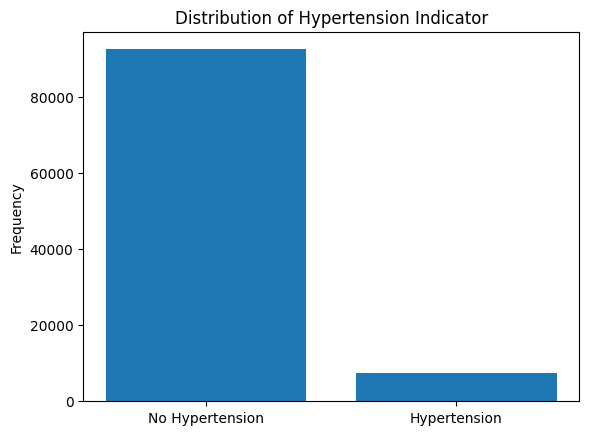

In [ ]:
hypertension_group = diabetes_df.groupby(['hypertension'])['heart_disease'].count()
plt.bar([0, 1], list(hypertension_group), tick_label=['No Hypertension', 'Hypertension'], align='center')
plt.title('Distribution of Hypertension Indicator')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

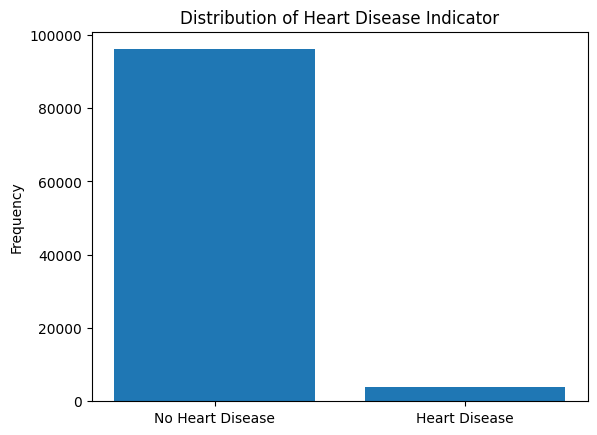

In [ ]:
heart_disease_group = diabetes_df.groupby(['heart_disease'])['diabetes'].count()
plt.bar([0, 1], list(heart_disease_group), tick_label=['No Heart Disease', 'Heart Disease'], align='center')
plt.title('Distribution of Heart Disease Indicator')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

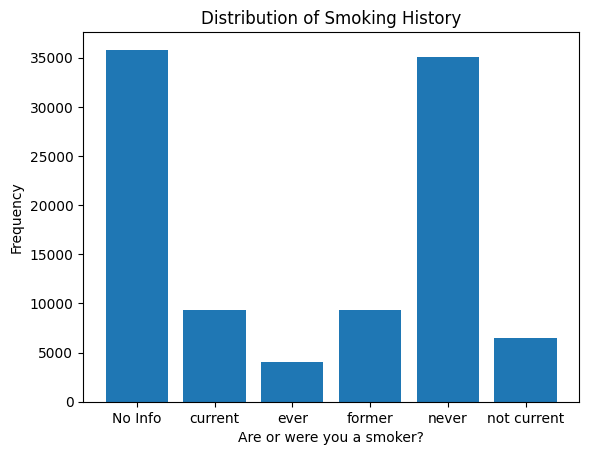

In [ ]:
smoking_group = diabetes_df.groupby(['smoking_history'])['heart_disease'].count()
plt.bar(smoking_group.index, list(smoking_group))
plt.title('Distribution of Smoking History')
plt.xlabel('Are or were you a smoker?')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

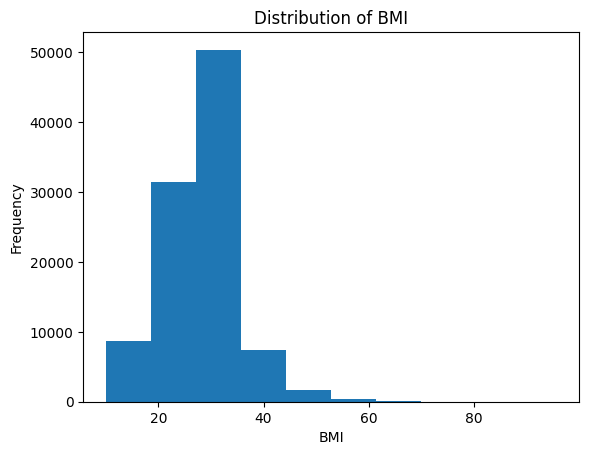

In [ ]:
plt.hist(diabetes_df['bmi'])
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 0, 'BMI')

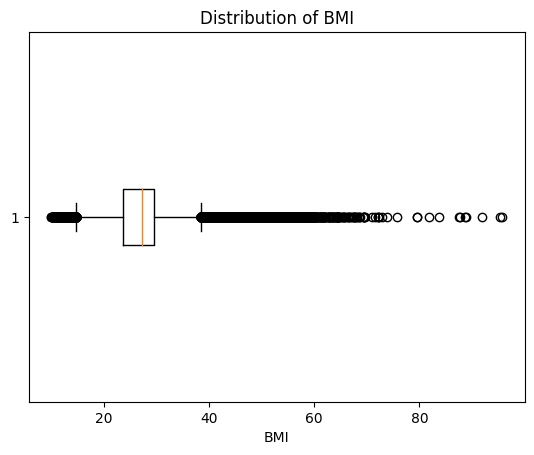

In [ ]:
plt.boxplot(diabetes_df['bmi'], vert=False)
plt.title('Distribution of BMI')
plt.xlabel('BMI')

Text(0, 0.5, 'Frequency')

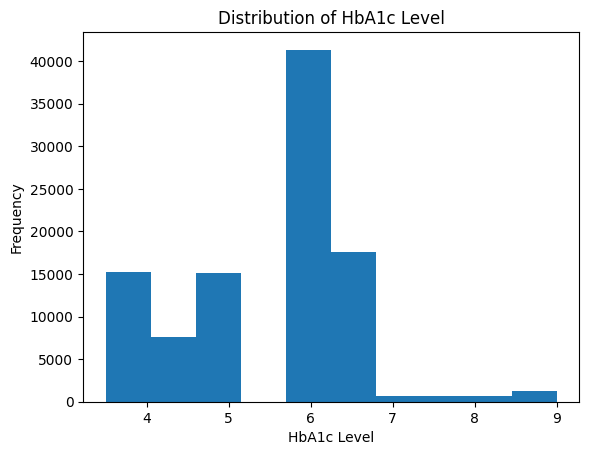

In [ ]:
plt.hist(diabetes_df['HbA1c_level'])
plt.title('Distribution of HbA1c Level')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'HbA1c Level')

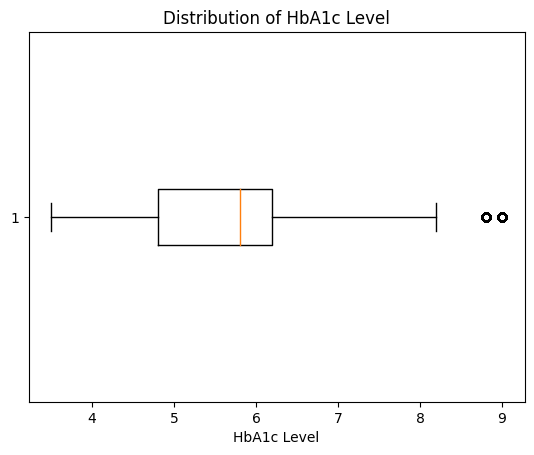

In [ ]:
plt.boxplot(diabetes_df['HbA1c_level'], vert=False)
plt.title('Distribution of HbA1c Level')
plt.xlabel('HbA1c Level')

Text(0, 0.5, 'Frequency')

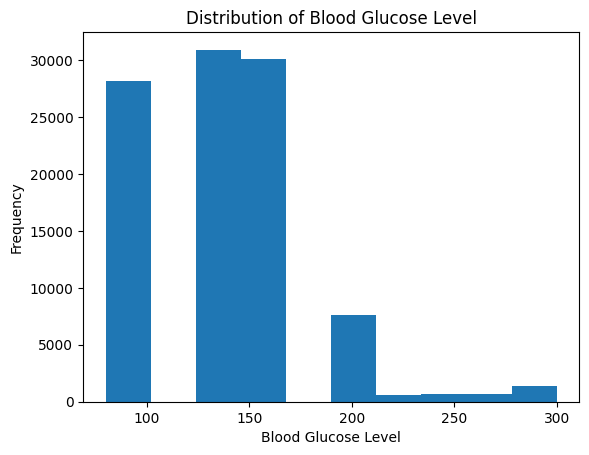

In [ ]:
plt.hist(diabetes_df['blood_glucose_level'])
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'Blood Glucose Level')

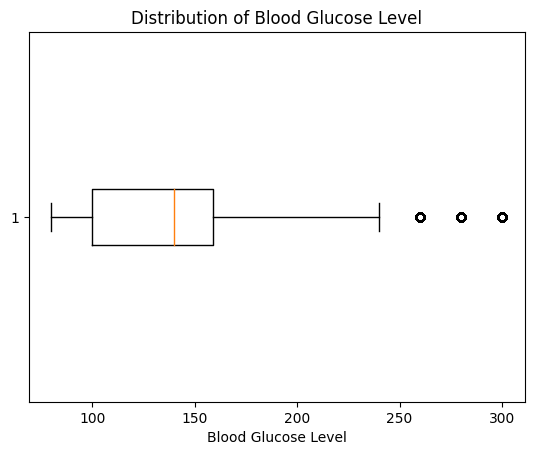

In [ ]:
plt.boxplot(diabetes_df['blood_glucose_level'], vert=False)
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level')

Text(0, 0.5, 'Frequency')

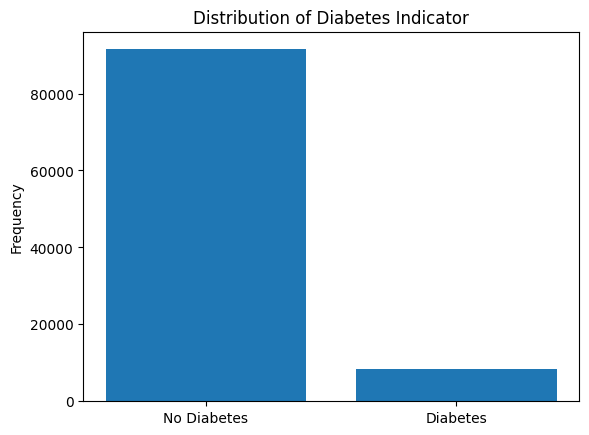

In [ ]:
diabetes_group = diabetes_df.groupby(['diabetes'])['heart_disease'].count()
plt.bar([0, 1], list(diabetes_group), tick_label=['No Diabetes', 'Diabetes'], align='center')
plt.title('Distribution of Diabetes Indicator')
plt.ylabel('Frequency')

In [ ]:
diabetics_group = diabetes_df[diabetes_df['diabetes'] == 1]
diabetics_group

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


Text(0, 0.5, 'Frequency')

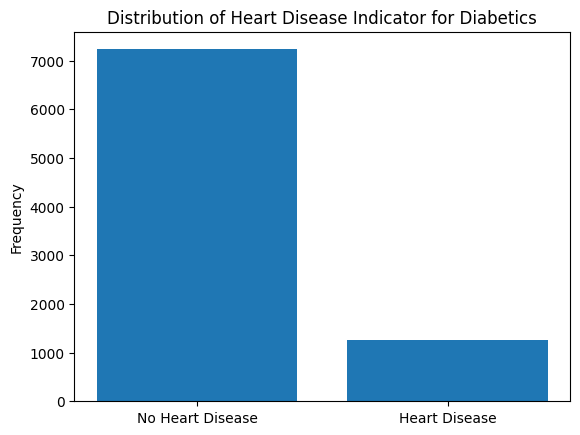

In [ ]:
heart_disease_group_diabetics = diabetics_group.groupby(['heart_disease'])['diabetes'].count()
plt.bar([0, 1], list(heart_disease_group_diabetics), tick_label=['No Heart Disease', 'Heart Disease'], align='center')
plt.title('Distribution of Heart Disease Indicator for Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

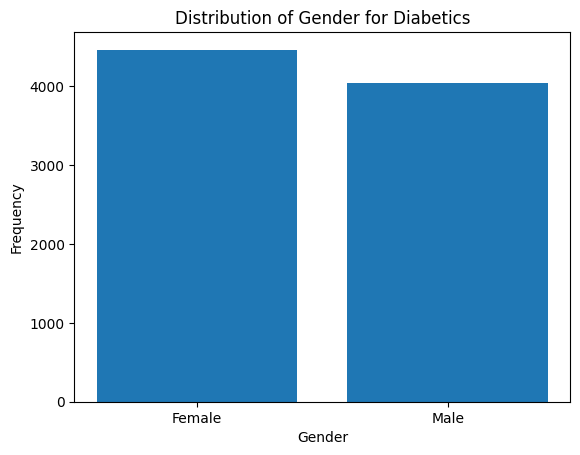

In [ ]:
gender_group_diabetics = diabetics_group.groupby(['gender'])['heart_disease'].count()
plt.bar(gender_group_diabetics.index, list(gender_group_diabetics))
plt.title('Distribution of Gender for Diabetics')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

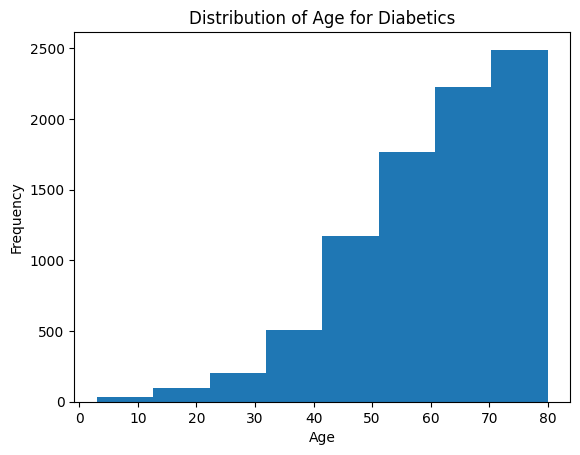

In [ ]:
plt.hist(diabetics_group['age'], bins=8)
plt.title('Distribution of Age for Diabetics')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 0, 'Age')

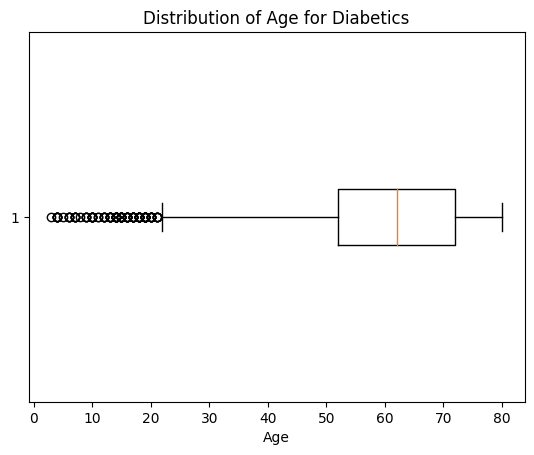

In [ ]:
plt.boxplot(diabetics_group['age'], vert=False)
plt.title('Distribution of Age for Diabetics')
plt.xlabel('Age')

Text(0, 0.5, 'Frequency')

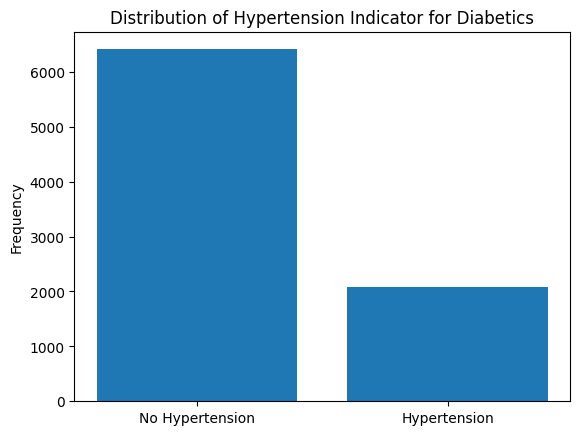

In [ ]:
hypertension_group_diabetics = diabetics_group.groupby(['hypertension'])['heart_disease'].count()
plt.bar([0, 1], list(hypertension_group_diabetics), tick_label=['No Hypertension', 'Hypertension'], align='center')
plt.title('Distribution of Hypertension Indicator for Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

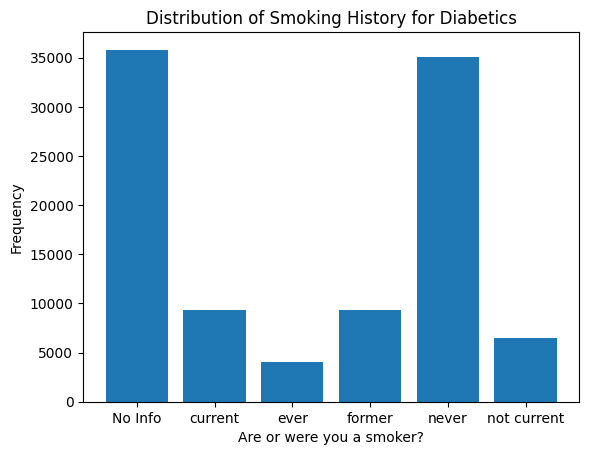

In [ ]:
smoking_group_diabetics = diabetics_group.groupby(['smoking_history'])['heart_disease'].count()
plt.bar(smoking_group_diabetics.index, list(smoking_group))
plt.title('Distribution of Smoking History for Diabetics')
plt.xlabel('Are or were you a smoker?')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

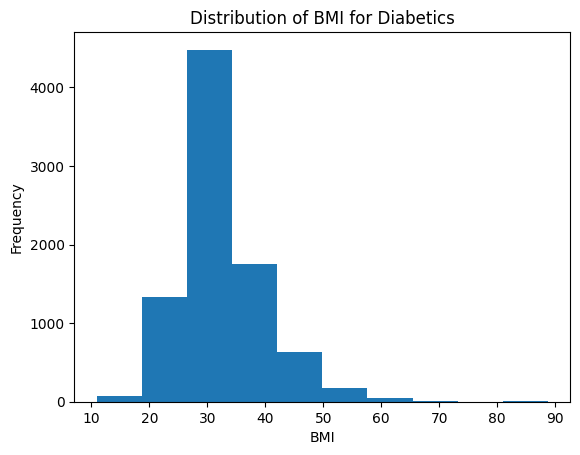

In [ ]:
plt.hist(diabetics_group['bmi'])
plt.title('Distribution of BMI for Diabetics')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 0, 'BMI')

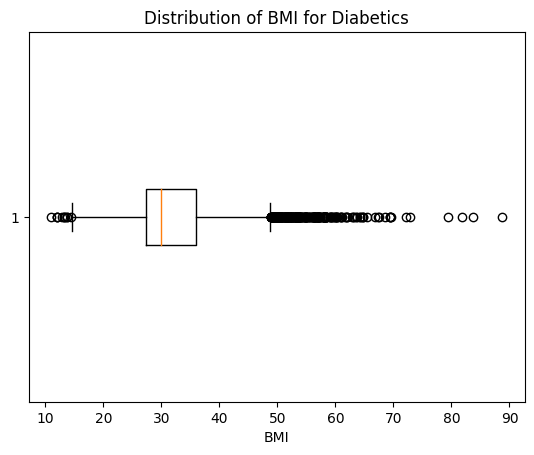

In [ ]:
plt.boxplot(diabetics_group['bmi'], vert=False)
plt.title('Distribution of BMI for Diabetics')
plt.xlabel('BMI')

Text(0, 0.5, 'Frequency')

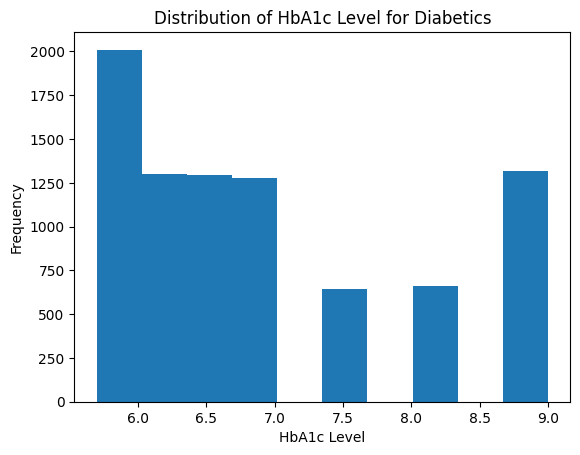

In [ ]:
plt.hist(diabetics_group['HbA1c_level'])
plt.title('Distribution of HbA1c Level for Diabetics')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'HbA1c Level')

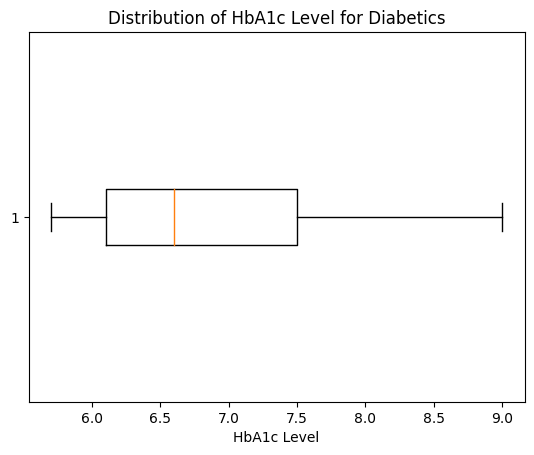

In [ ]:
plt.boxplot(diabetics_group['HbA1c_level'], vert=False)
plt.title('Distribution of HbA1c Level for Diabetics')
plt.xlabel('HbA1c Level')

Text(0, 0.5, 'Frequency')

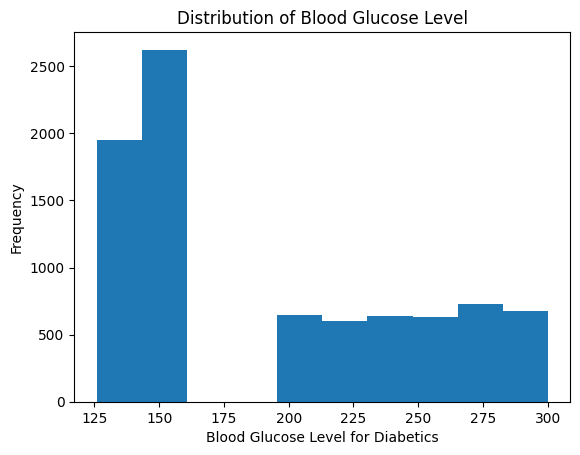

In [ ]:
plt.hist(diabetics_group['blood_glucose_level'])
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level for Diabetics')
plt.ylabel('Frequency')

Text(0.5, 0, 'Blood Glucose Level')

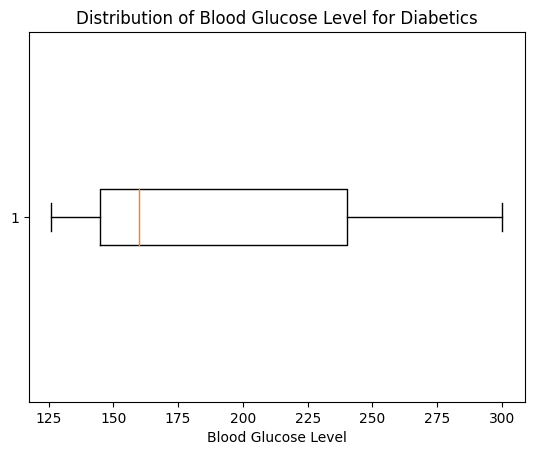

In [ ]:
plt.boxplot(diabetics_group['blood_glucose_level'], vert=False)
plt.title('Distribution of Blood Glucose Level for Diabetics')
plt.xlabel('Blood Glucose Level')

In [ ]:
non_diabetics_group = diabetes_df[diabetes_df['diabetes'] == 0]
non_diabetics_group

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Text(0, 0.5, 'Frequency')

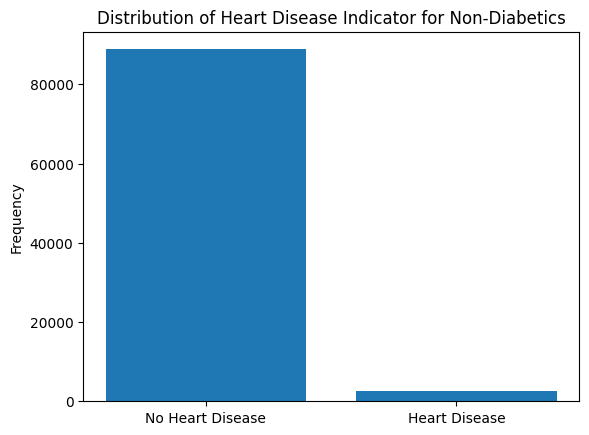

In [ ]:
heart_disease_group_non_diabetics = non_diabetics_group.groupby(['heart_disease'])['diabetes'].count()
plt.bar([0, 1], list(heart_disease_group_non_diabetics), tick_label=['No Heart Disease', 'Heart Disease'], align='center')
plt.title('Distribution of Heart Disease Indicator for Non-Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

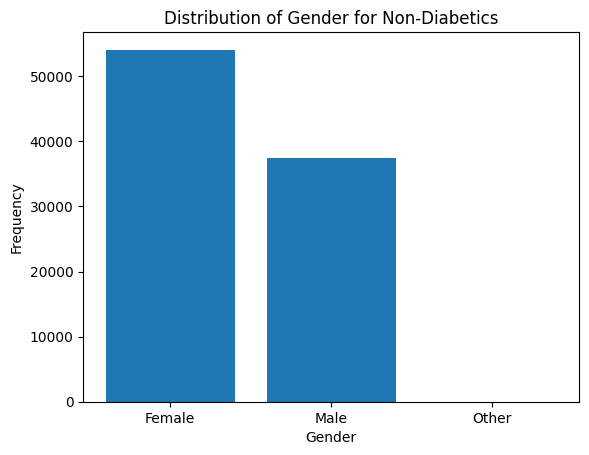

In [ ]:
gender_group_non_diabetics = non_diabetics_group.groupby(['gender'])['heart_disease'].count()
plt.bar(gender_group_non_diabetics.index, list(gender_group_non_diabetics))
plt.title('Distribution of Gender for Non-Diabetics')
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

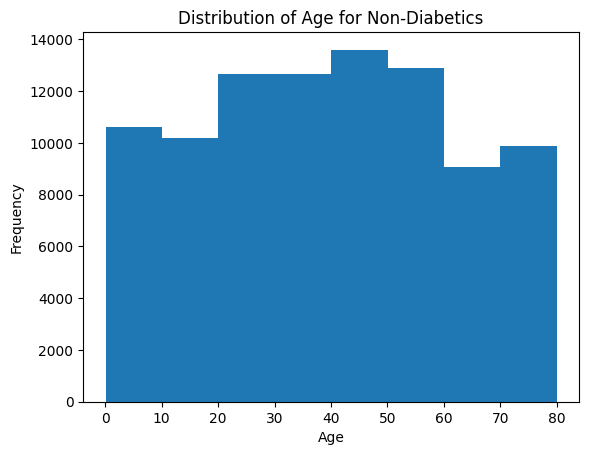

In [ ]:
plt.hist(non_diabetics_group['age'], bins=8)
plt.title('Distribution of Age for Non-Diabetics')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 0, 'Age')

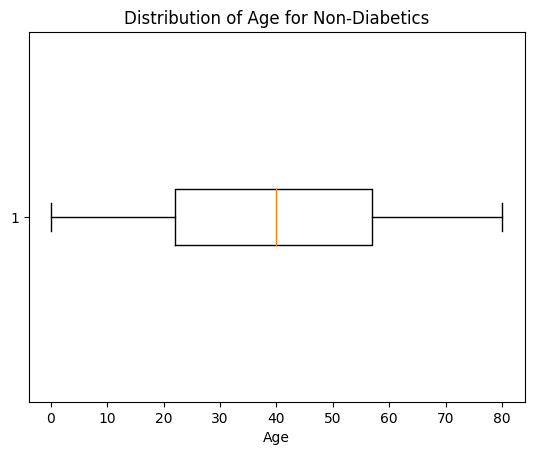

In [ ]:
plt.boxplot(non_diabetics_group['age'], vert=False)
plt.title('Distribution of Age for Non-Diabetics')
plt.xlabel('Age')

Text(0, 0.5, 'Frequency')

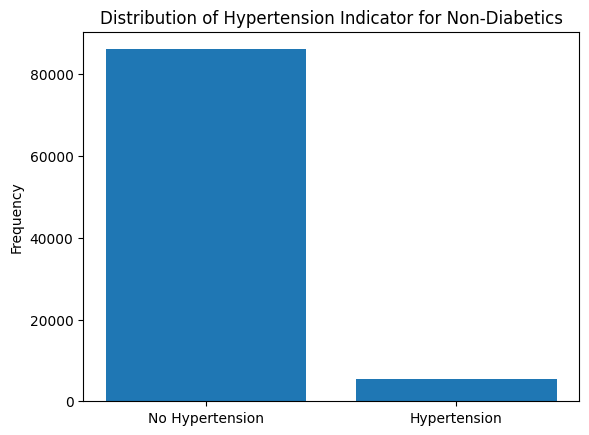

In [ ]:
hypertension_group_non_diabetics = non_diabetics_group.groupby(['hypertension'])['heart_disease'].count()
plt.bar([0, 1], list(hypertension_group_non_diabetics), tick_label=['No Hypertension', 'Hypertension'], align='center')
plt.title('Distribution of Hypertension Indicator for Non-Diabetics')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

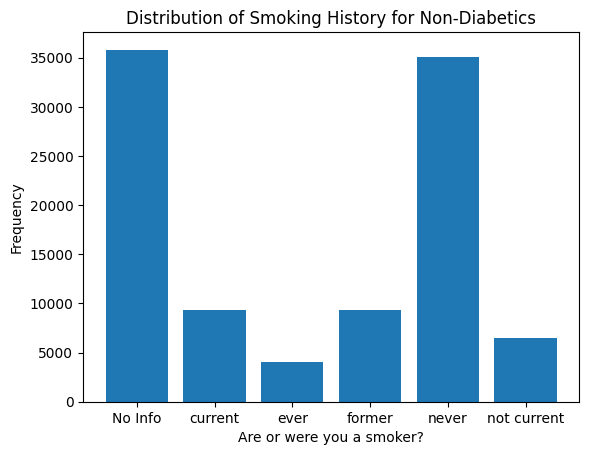

In [ ]:
smoking_group_non_diabetics = non_diabetics_group.groupby(['smoking_history'])['heart_disease'].count()
plt.bar(smoking_group_non_diabetics.index, list(smoking_group))
plt.title('Distribution of Smoking History for Non-Diabetics')
plt.xlabel('Are or were you a smoker?')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

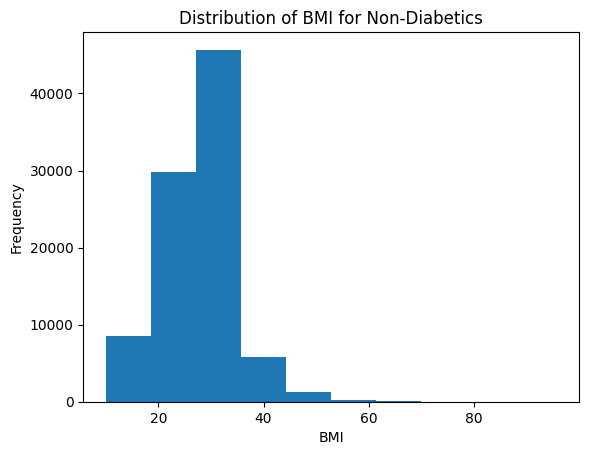

In [ ]:
plt.hist(non_diabetics_group['bmi'])
plt.title('Distribution of BMI for Non-Diabetics')
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0.5, 0, 'BMI')

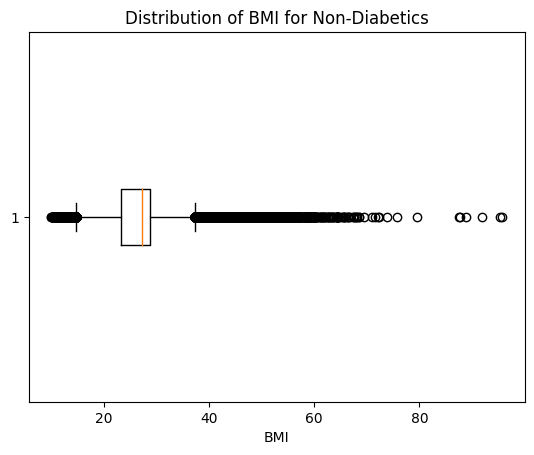

In [ ]:
plt.boxplot(non_diabetics_group['bmi'], vert=False)
plt.title('Distribution of BMI for Non-Diabetics')
plt.xlabel('BMI')

Text(0, 0.5, 'Frequency')

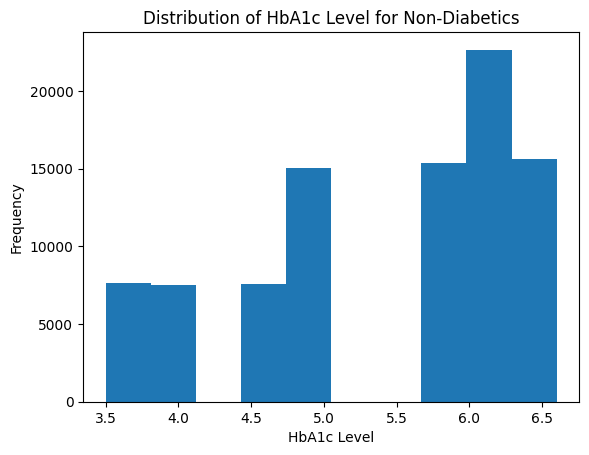

In [ ]:
plt.hist(non_diabetics_group['HbA1c_level'])
plt.title('Distribution of HbA1c Level for Non-Diabetics')
plt.xlabel('HbA1c Level')
plt.ylabel('Frequency')

Text(0.5, 0, 'HbA1c Level')

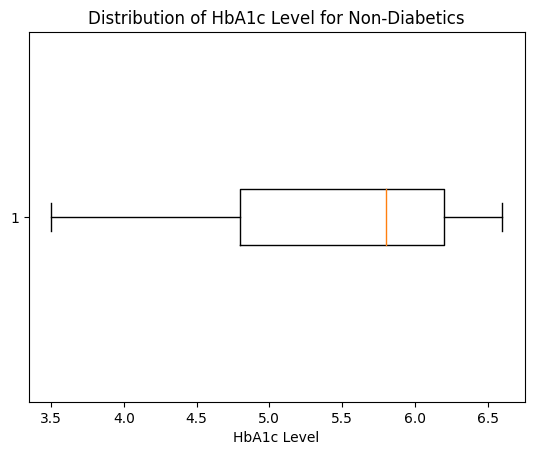

In [ ]:
plt.boxplot(non_diabetics_group['HbA1c_level'], vert=False)
plt.title('Distribution of HbA1c Level for Non-Diabetics')
plt.xlabel('HbA1c Level')

Text(0, 0.5, 'Frequency')

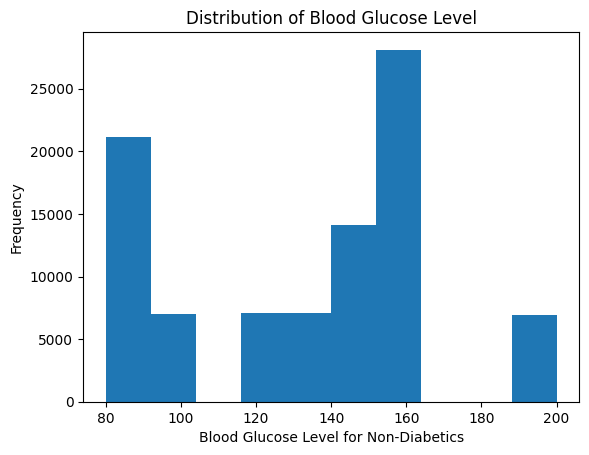

In [ ]:
plt.hist(non_diabetics_group['blood_glucose_level'])
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level for Non-Diabetics')
plt.ylabel('Frequency')

Text(0.5, 0, 'Blood Glucose Level')

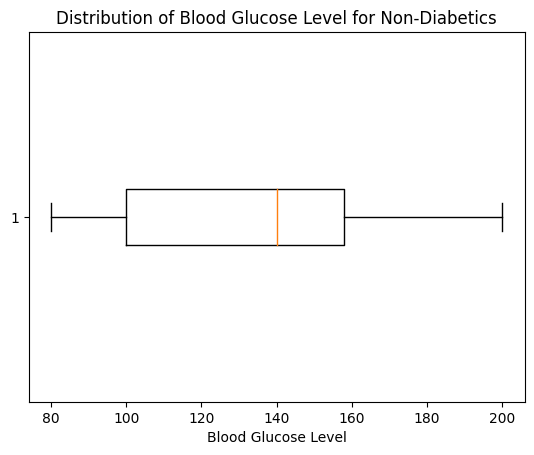

In [ ]:
plt.boxplot(non_diabetics_group['blood_glucose_level'], vert=False)
plt.title('Distribution of Blood Glucose Level for Non-Diabetics')
plt.xlabel('Blood Glucose Level')

In [ ]:
heart_disease = diabetes_df[diabetes_df['heart_disease'] == 1]
heart_disease

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
23,Female,72.0,0,1,former,27.94,6.5,130,0
26,Male,67.0,0,1,not current,27.32,6.5,200,1
42,Female,77.0,1,1,never,32.02,5.0,159,0
...,...,...,...,...,...,...,...,...,...
99826,Male,63.0,0,1,No Info,27.32,6.6,300,1
99848,Male,80.0,1,1,former,28.79,5.8,90,0
99912,Male,80.0,0,1,former,27.32,5.0,140,0
99935,Female,65.0,1,1,never,33.55,8.2,140,1


Text(0, 0.5, 'Frequency')

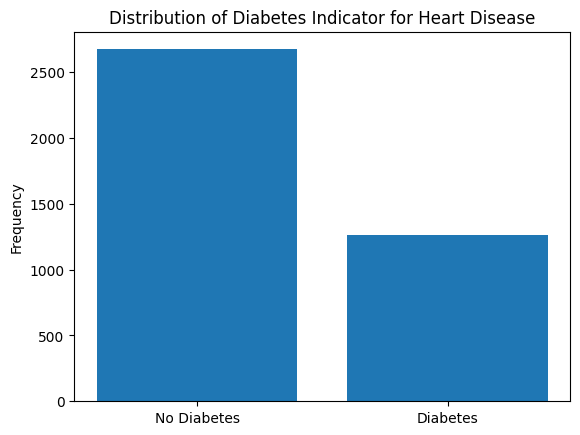

In [ ]:
diabetes_dist_heart_disease = heart_disease.groupby(['diabetes'])['heart_disease'].count()
plt.bar([0, 1], list(diabetes_dist_heart_disease), tick_label=['No Diabetes', 'Diabetes'], align='center')
plt.title('Distribution of Diabetes Indicator for Heart Disease')
plt.ylabel('Frequency')

## Data Wrangling and Cleaning Steps to Do:

1. One-Hot Encode gender feature
2. Group former, ever, and not current as the same value together since they mean the same, more or less
3. Label Encode smoking history
4. Convert age from float type to int type
5. Normalize continuous data (eg BMI, HbA!c_level, blood_glucose_level)

In [ ]:
gender_dummies = pd.get_dummies(diabetes_df['gender'])
gender_dummies

,Female,Male,Other
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
99995,1,0,0
99996,1,0,0
99997,0,1,0
99998,1,0,0


In [ ]:
diabetes_df['Female'] = gender_dummies['Female']
diabetes_df['Male'] = gender_dummies['Male']
diabetes_df['Other'] = gender_dummies['Other']
diabetes_df.drop(['gender'], axis=1, inplace=True)
diabetes_df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,No Info,27.32,6.2,90,0,1,0,0
99996,2.0,0,0,No Info,17.37,6.5,100,0,1,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,never,35.42,4.0,100,0,1,0,0


In [ ]:
diabetes_df['smoking_history'].replace(['ever', 'not current'], 'former', inplace=True)
diabetes_df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,80.0,0,1,never,25.19,6.6,140,0,1,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,1,0,0
2,28.0,0,0,never,27.32,5.7,158,0,0,1,0
3,36.0,0,0,current,23.45,5.0,155,0,1,0,0
4,76.0,1,1,current,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,No Info,27.32,6.2,90,0,1,0,0
99996,2.0,0,0,No Info,17.37,6.5,100,0,1,0,0
99997,66.0,0,0,former,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,never,35.42,4.0,100,0,1,0,0


In [ ]:
encoder = LabelEncoder()
diabetes_df['smoking_history'] = encoder.fit_transform(np.array(diabetes_df['smoking_history']).reshape(-1,1))
diabetes_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,80.0,0,1,3,25.19,6.6,140,0,1,0,0
1,54.0,0,0,0,27.32,6.6,80,0,1,0,0
2,28.0,0,0,3,27.32,5.7,158,0,0,1,0
3,36.0,0,0,1,23.45,5.0,155,0,1,0,0
4,76.0,1,1,1,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,0,27.32,6.2,90,0,1,0,0
99996,2.0,0,0,0,17.37,6.5,100,0,1,0,0
99997,66.0,0,0,2,27.83,5.7,155,0,0,1,0
99998,24.0,0,0,3,35.42,4.0,100,0,1,0,0


In [ ]:
diabetes_df['age'] = diabetes_df['age'].astype('int64')
diabetes_df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,80,0,1,3,25.19,6.6,140,0,1,0,0
1,54,0,0,0,27.32,6.6,80,0,1,0,0
2,28,0,0,3,27.32,5.7,158,0,0,1,0
3,36,0,0,1,23.45,5.0,155,0,1,0,0
4,76,1,1,1,20.14,4.8,155,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,80,0,0,0,27.32,6.2,90,0,1,0,0
99996,2,0,0,0,17.37,6.5,100,0,1,0,0
99997,66,0,0,2,27.83,5.7,155,0,0,1,0
99998,24,0,0,3,35.42,4.0,100,0,1,0,0


In [ ]:
scaler = MinMaxScaler()
diabetes_df['age'] = scaler.fit_transform(np.array(diabetes_df['age']).reshape(-1,1))
diabetes_df['bmi'] = scaler.fit_transform(np.array(diabetes_df['bmi']).reshape(-1,1))
diabetes_df['HbA1c_level'] = scaler.fit_transform(np.array(diabetes_df['HbA1c_level']).reshape(-1,1))
diabetes_df['blood_glucose_level'] = scaler.fit_transform(np.array(diabetes_df['blood_glucose_level']).reshape(-1,1))
diabetes_df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other
0,1.0000,0,1,3,0.177171,0.563636,0.272727,0,1,0,0
1,0.6750,0,0,0,0.202031,0.563636,0.000000,0,1,0,0
2,0.3500,0,0,3,0.202031,0.400000,0.354545,0,0,1,0
3,0.4500,0,0,1,0.156863,0.272727,0.340909,0,1,0,0
4,0.9500,1,1,1,0.118231,0.236364,0.340909,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0000,0,0,0,0.202031,0.490909,0.045455,0,1,0,0
99996,0.0250,0,0,0,0.085901,0.545455,0.090909,0,1,0,0
99997,0.8250,0,0,2,0.207983,0.400000,0.340909,0,0,1,0
99998,0.3000,0,0,3,0.296569,0.090909,0.090909,0,1,0,0


In [ ]:
diabetes_X = diabetes_df.drop(['diabetes'], axis=1)
diabetes_X

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Female,Male,Other
0,1.0000,0,1,3,0.177171,0.563636,0.272727,1,0,0
1,0.6750,0,0,0,0.202031,0.563636,0.000000,1,0,0
2,0.3500,0,0,3,0.202031,0.400000,0.354545,0,1,0
3,0.4500,0,0,1,0.156863,0.272727,0.340909,1,0,0
4,0.9500,1,1,1,0.118231,0.236364,0.340909,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,1.0000,0,0,0,0.202031,0.490909,0.045455,1,0,0
99996,0.0250,0,0,0,0.085901,0.545455,0.090909,1,0,0
99997,0.8250,0,0,2,0.207983,0.400000,0.340909,0,1,0
99998,0.3000,0,0,3,0.296569,0.090909,0.090909,1,0,0


In [ ]:
diabetes_y = diabetes_df['diabetes']
diabetes_y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [ ]:
smote = SMOTE(random_state=42)
diabetes_X, diabetes_y = smote.fit_resample(diabetes_X, diabetes_y)

In [ ]:
diabetes_X

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,Female,Male,Other
0,1.000000,0,1,3,0.177171,0.563636,0.272727,1,0,0
1,0.675000,0,0,0,0.202031,0.563636,0.000000,1,0,0
2,0.350000,0,0,3,0.202031,0.400000,0.354545,0,1,0
3,0.450000,0,0,1,0.156863,0.272727,0.340909,1,0,0
4,0.950000,1,1,1,0.118231,0.236364,0.340909,0,1,0
...,...,...,...,...,...,...,...,...,...,...
182995,0.731399,1,1,2,0.202031,0.509525,0.352182,1,0,0
182996,0.995470,1,0,3,0.228176,0.490909,0.336030,1,0,0
182997,0.825000,0,0,3,0.213550,0.975596,0.575354,0,1,0
182998,0.882313,0,0,2,0.321331,0.469634,0.871370,1,0,0


In [ ]:
diabetes_y

0         0
1         0
2         0
3         0
4         0
         ..
182995    1
182996    1
182997    1
182998    1
182999    1
Name: diabetes, Length: 183000, dtype: int64

## Data Modeling

We want to predict diabetes and investigate the features that determines diabetes and their influences on the outcome. This is a classification problem.

Questions:

1. (Main question) What are the features that influence diabetes and how much influence do these features have?

2. (Main question) How do factors such as heart disease or gender/biological sex play a role in the development and risk of diabetes?

3. (Main question) Given values of all features, what is the probabilistic chance a person will get diabetes?

4. (Next step) What are the features that influence heart disease and how much influence do these features have?

5. (Next step) How does diabetes influence the risk of heart disease?

Novel Contributions:

1. Calculating probability risk of developing diabetes given the values of features

2. Determining how other diseases and health conditions such as heart disease plays a role in diabetes

3. Determining if one gender/biological sex has an increased chance of developing diabetes

4. Using training time as a determination of the best or most efficient model aside from testing phase performance (focusing on efficiency)

In [ ]:
results_dict = {
    "Model_Name": [],
    "Model_Type": [],
    "Training_Time": [],
    "Accuracy_Score": [],
    "ROC_AUC_Score": [],
    "Precision_Score": [],
    "Recall_Score": [],
    "F_Beta_Score_Beta_2": []
}

In [ ]:
def format_number(number):
  if number < 10:
    return "0" + str(number)
  return str(number)

In [ ]:
def print_results(model, training_time_hours, training_time_minutes, training_time_seconds, valid_acc_score, valid_roc_auc_score, valid_precision_score, valid_recall_score, valid_fbeta_score, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score, X_test, y_test):
  print(f"Training time: "+str(training_time_hours)+" hours "+str(training_time_minutes)+" minutes "+str(training_time_seconds)+" seconds")
  print("")
  print(f"Validation Accuracy Score: " + str(valid_acc_score))
  print(f"Validation ROC-AUC Score: " + str(valid_roc_auc_score))
  print(f"Validation Precision Score: " + str(valid_precision_score))
  print(f"Validation Recall Score: " + str(valid_recall_score))
  print(f"Validation f-Beta Score: " + str(valid_fbeta_score))
  print("")
  print(f"Testing Accuracy Score: " + str(test_acc_score))
  print(f"Testing ROC-AUC Score: " + str(test_roc_auc_score))
  print(f"Testing Precision Score: " + str(test_precision_score))
  print(f"Testing Recall Score: " + str(test_recall_score))
  print(f"Testing f-Beta Score: " + str(test_fbeta_score))
  print(X_test)
  print(model.predict_proba(X_test))
  print(confusion_matrix(y_test, model.predict(X_test)))
  return

In [ ]:
def append_results(model_name, model_type, training_time, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score):
  model_name_list = results_dict['Model_Name']
  model_type_list = results_dict['Model_Type']
  training_time_list = results_dict['Training_Time']
  accuracy_list = results_dict['Accuracy_Score']
  roc_auc_list = results_dict['ROC_AUC_Score']
  precision_list = results_dict['Precision_Score']
  recall_list = results_dict['Recall_Score']
  f_beta_list = results_dict['F_Beta_Score_Beta_2']

  model_name_list.append(model_name)
  model_type_list.append(model_type)
  training_time_list.append(training_time)
  accuracy_list.append(test_acc_score)
  roc_auc_list.append(test_roc_auc_score)
  precision_list.append(test_precision_score)
  recall_list.append(test_recall_score)
  f_beta_list.append(test_fbeta_score)

  results_dict['Model_Name'] = model_name_list
  results_dict['Model_Type'] = model_type_list
  results_dict['Training_Time'] = training_time_list
  results_dict['Accuracy_Score'] = accuracy_list
  results_dict['ROC_AUC_Score'] = roc_auc_list
  results_dict['Precision_Score'] = precision_list
  results_dict['Recall_Score'] = recall_list
  results_dict['F_Beta_Score_Beta_2'] = f_beta_list
  return results_dict

### Diabetes Splitting Dataset

In [ ]:
X_train, X_val_test, y_train, y_val_test = train_test_split(diabetes_X, diabetes_y, test_size=0.20, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_val_test, y_val_test, test_size=0.50, random_state=42)

### Baseline Models (Diabetes)

Baseline Models with no hyperparameter tuning

1. Naive Bayes
2. Logistic Regression
3. Random Forests
4. XGBoost
5. CATBoost
6. LightGBM
7. Gradient Boosted Trees

In [ ]:
def baseline_model_func(model_name, model, X_train, y_train, X_valid, y_valid, X_test, y_test):
  start = time.time()
  baseline_model = model.fit(X_train, y_train)
  end = time.time()

  training_time = end - start
  training_time_seconds = training_time % 60.0
  training_time_seconds = round(training_time_seconds, 5)
  training_time_minutes = training_time // 60
  training_time_hours = int(training_time_minutes // 60)
  training_time_minutes = int(training_time_minutes % 60)

  valid_acc_score = baseline_model.score(X_valid, y_valid)
  valid_acc_score = round(valid_acc_score, 5)
  valid_roc_auc_score = roc_auc_score(y_valid, baseline_model.predict_proba(X_valid)[:, 1])
  valid_roc_auc_score = round(valid_roc_auc_score, 5)
  valid_precision_score = precision_score(y_valid, baseline_model.predict(X_valid))
  valid_precision_score = round(valid_precision_score, 5)
  valid_recall_score = recall_score(y_valid, baseline_model.predict(X_valid))
  valid_recall_score = round(valid_recall_score, 5)
  valid_fbeta_score = fbeta_score(y_valid, baseline_model.predict(X_valid), beta=2)
  valid_fbeta_score = round(valid_fbeta_score, 5)

  test_acc_score = model.score(X_test, y_test)
  test_acc_score = round(test_acc_score, 5)
  test_roc_auc_score = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
  test_roc_auc_score = round(test_roc_auc_score, 5)
  test_precision_score = precision_score(y_test, baseline_model.predict(X_test))
  test_precision_score = round(test_precision_score, 5)
  test_recall_score = recall_score(y_test, baseline_model.predict(X_test))
  test_recall_score = round(test_recall_score, 5)
  test_fbeta_score = fbeta_score(y_test, baseline_model.predict(X_test), beta=2)
  test_fbeta_score = round(test_fbeta_score, 5)

  print_results(baseline_model, training_time_hours, training_time_minutes, training_time_seconds, valid_acc_score, valid_roc_auc_score, valid_precision_score, valid_recall_score, valid_fbeta_score, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score, X_test, y_test)

  training_time_hours_str = format_number(training_time_hours)
  training_time_minutes_str = format_number(training_time_minutes)
  training_time_seconds_str = format_number(training_time_seconds)
  training_time_str = training_time_hours_str + ":" + training_time_minutes_str + ":" + training_time_seconds_str

  append_results(model_name, "Baseline", training_time_str, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score)

  return baseline_model

In [ ]:
from sklearn.naive_bayes import GaussianNB

baseline_nb = baseline_model_func("Gaussian Naive Bayes", GaussianNB(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 0.05223 seconds

Validation Accuracy Score: 0.67743
Validation ROC-AUC Score: 0.92432
Validation Precision Score: 0.60987
Validation Recall Score: 0.99522
Validation f-Beta Score: 0.88356

Testing Accuracy Score: 0.66787
Testing ROC-AUC Score: 0.91755
Testing Precision Score: 0.6003
Testing Recall Score: 0.99462
Testing f-Beta Score: 0.8791262135922329
             age  hypertension  heart_disease  smoking_history       bmi  \
854     0.325000             0              0                0  0.102007   
161523  0.718282             1              0                2  0.237568   
1450    0.450000             0              0                2  0.202031   
130164  0.854187             0              1                0  0.185858   
8839    0.550000             0              0                3  0.158847   
...          ...           ...            ...              ...       ...   
135660  0.751141             0              0                1  0.222184   
4341

In [ ]:
from sklearn.linear_model import LogisticRegression

baseline_lr = baseline_model_func("Logistic Regression", LogisticRegression(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 1.6472 seconds

Validation Accuracy Score: 0.88749
Validation ROC-AUC Score: 0.96337
Validation Precision Score: 0.89047
Validation Recall Score: 0.88515
Validation f-Beta Score: 0.88621

Testing Accuracy Score: 0.88421
Testing ROC-AUC Score: 0.9615
Testing Precision Score: 0.88417
Testing Recall Score: 0.88291
Testing f-Beta Score: 0.8831608323994111
             age  hypertension  heart_disease  smoking_history       bmi  \
854     0.325000             0              0                0  0.102007   
161523  0.718282             1              0                2  0.237568   
1450    0.450000             0              0                2  0.202031   
130164  0.854187             0              1                0  0.185858   
8839    0.550000             0              0                3  0.158847   
...          ...           ...            ...              ...       ...   
135660  0.751141             0              0                1  0.222184   
43411

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

baseline_rf = baseline_model_func("Random Forest", RandomForestClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 19.36822 seconds

Validation Accuracy Score: 0.9777
Validation ROC-AUC Score: 0.99772
Validation Precision Score: 0.97546
Validation Recall Score: 0.98033
Validation f-Beta Score: 0.97935

Testing Accuracy Score: 0.9765
Testing ROC-AUC Score: 0.99783
Testing Precision Score: 0.9743
Testing Recall Score: 0.97858
Testing f-Beta Score: 0.977721685689201
             age  hypertension  heart_disease  smoking_history       bmi  \
854     0.325000             0              0                0  0.102007   
161523  0.718282             1              0                2  0.237568   
1450    0.450000             0              0                2  0.202031   
130164  0.854187             0              1                0  0.185858   
8839    0.550000             0              0                3  0.158847   
...          ...           ...            ...              ...       ...   
135660  0.751141             0              0                1  0.222184   
43411 

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

baseline_bag = baseline_model_func("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42)), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 4.06404 seconds

Validation Accuracy Score: 0.97541
Validation ROC-AUC Score: 0.99531
Validation Precision Score: 0.9812
Validation Recall Score: 0.96968
Validation f-Beta Score: 0.97197

Testing Accuracy Score: 0.97426
Testing ROC-AUC Score: 0.99459
Testing Precision Score: 0.9803
Testing Recall Score: 0.96771
Testing f-Beta Score: 0.9702002070347774
             age  hypertension  heart_disease  smoking_history       bmi  \
854     0.325000             0              0                0  0.102007   
161523  0.718282             1              0                2  0.237568   
1450    0.450000             0              0                2  0.202031   
130164  0.854187             0              1                0  0.185858   
8839    0.550000             0              0                3  0.158847   
...          ...           ...            ...              ...       ...   
135660  0.751141             0              0                1  0.222184   
43411

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

baseline_ada = baseline_model_func("AdaBoost", AdaBoostClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 6.01921 seconds

Validation Accuracy Score: 0.94016
Validation ROC-AUC Score: 0.98982
Validation Precision Score: 0.93742
Validation Recall Score: 0.94404
Validation f-Beta Score: 0.94271

Testing Accuracy Score: 0.93716
Testing ROC-AUC Score: 0.98883
Testing Precision Score: 0.93332
Testing Recall Score: 0.94091
Testing f-Beta Score: 0.9393779883317981
             age  hypertension  heart_disease  smoking_history       bmi  \
854     0.325000             0              0                0  0.102007   
161523  0.718282             1              0                2  0.237568   
1450    0.450000             0              0                2  0.202031   
130164  0.854187             0              1                0  0.185858   
8839    0.550000             0              0                3  0.158847   
...          ...           ...            ...              ...       ...   
135660  0.751141             0              0                1  0.222184   
434

In [ ]:
import xgboost as xgb

baseline_xgb = baseline_model_func("XGBoost", xgb.XGBClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 1.16756 seconds

Validation Accuracy Score: 0.97678
Validation ROC-AUC Score: 0.99756
Validation Precision Score: 0.99105
Validation Recall Score: 0.96251
Validation f-Beta Score: 0.96809

Testing Accuracy Score: 0.9747
Testing ROC-AUC Score: 0.99716
Testing Precision Score: 0.99046
Testing Recall Score: 0.95837
Testing f-Beta Score: 0.9646213377556659
             age  hypertension  heart_disease  smoking_history       bmi  \
854     0.325000             0              0                0  0.102007   
161523  0.718282             1              0                2  0.237568   
1450    0.450000             0              0                2  0.202031   
130164  0.854187             0              1                0  0.185858   
8839    0.550000             0              0                3  0.158847   
...          ...           ...            ...              ...       ...   
135660  0.751141             0              0                1  0.222184   
4341

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

baseline_cb = baseline_model_func("CatBoost", CatBoostClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Learning rate set to 0.08662
0:	learn: 0.4871858	total: 78.7ms	remaining: 1m 18s
1:	learn: 0.3663729	total: 108ms	remaining: 53.8s
2:	learn: 0.3101434	total: 141ms	remaining: 46.8s
3:	learn: 0.2650536	total: 180ms	remaining: 44.9s
4:	learn: 0.2430827	total: 213ms	remaining: 42.5s
5:	learn: 0.2255399	total: 243ms	remaining: 40.3s
6:	learn: 0.2140520	total: 273ms	remaining: 38.7s
7:	learn: 0.2065212	total: 318ms	remaining: 39.5s
8:	learn: 0.1953952	total: 351ms	remaining: 38.6s
9:	learn: 0.1905517	total: 393ms	remaining: 38.9s
10:	learn: 0.1847913	total: 447ms	remaining: 40.2s
11:	learn: 0.1785668	total: 525ms	remaining: 43.2s
12:	learn: 0.1761921	total: 645ms	remaining: 49s
13:	learn: 0.1710012	total: 752ms	remaining: 52.9s
14:	learn: 0.1690955	total: 824ms	remaining: 54.1s
15:	learn: 0.1651274	total: 871ms	remaining: 53.6s
16:	learn: 0.1614586	total: 900ms	remaining: 52.1s
17:	learn: 0.1581668	total: 930ms	remaining: 50.7s
18:	learn: 0.1537078	total: 969ms	remaining: 50s
19:	learn: 0.1

In [ ]:
import lightgbm as lgb

baseline_lgb = baseline_model_func("LightGBM", lgb.LGBMClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

[LightGBM] [Info] Number of positive: 73193, number of negative: 73207
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1032
[LightGBM] [Info] Number of data points in the train set: 146400, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499952 -> initscore=-0.000191
[LightGBM] [Info] Start training from score -0.000191
Training time: 0 hours 0 minutes 4.00555 seconds

Validation Accuracy Score: 0.9788
Validation ROC-AUC Score: 0.99786
Validation Precision Score: 0.99461
Validation Recall Score: 0.96306
Validation f-Beta Score: 0.96921

Testing Accuracy Score: 0.97612
Testing ROC-AUC Score: 0.99734
Testing Precision Score: 0.9934
Testing Recall Score: 0.95837
Testing f-Beta Score: 0.9651762207128475
             age  hypertension  heart_disease  smoking_history       bmi  \
854     0.325000             0          

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

baseline_gb = baseline_model_func("Gradient Boosting", GradientBoostingClassifier(), X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 40.41739 seconds

Validation Accuracy Score: 0.95781
Validation ROC-AUC Score: 0.99452
Validation Precision Score: 0.9639
Validation Recall Score: 0.95175
Validation f-Beta Score: 0.95416

Testing Accuracy Score: 0.95486
Testing ROC-AUC Score: 0.99373
Testing Precision Score: 0.96184
Testing Recall Score: 0.94684
Testing f-Beta Score: 0.9497994622945041
             age  hypertension  heart_disease  smoking_history       bmi  \
854     0.325000             0              0                0  0.102007   
161523  0.718282             1              0                2  0.237568   
1450    0.450000             0              0                2  0.202031   
130164  0.854187             0              1                0  0.185858   
8839    0.550000             0              0                3  0.158847   
...          ...           ...            ...              ...       ...   
135660  0.751141             0              0                1  0.222184   
434

In [ ]:
results_dict

{'Model_Name': ['Gaussian Naive Bayes',
  'Logistic Regression',
  'Random Forest',
  'Bagging',
  'AdaBoost',
  'XGBoost',
  'CatBoost',
  'LightGBM',
  'Gradient Boosting'],
 'Model_Type': ['Baseline',
  'Baseline',
  'Baseline',
  'Baseline',
  'Baseline',
  'Baseline',
  'Baseline',
  'Baseline',
  'Baseline'],
 'Training_Time': ['00:00:00.05223',
  '00:00:01.6472',
  '00:00:19.36822',
  '00:00:04.06404',
  '00:00:06.01921',
  '00:00:01.16756',
  '00:01:19.92198',
  '00:00:04.00555',
  '00:00:40.41739'],
 'Accuracy_Score': [0.66787,
  0.88421,
  0.9765,
  0.97426,
  0.93716,
  0.9747,
  0.98115,
  0.97612,
  0.95486],
 'ROC_AUC_Score': [0.91755,
  0.9615,
  0.99783,
  0.99459,
  0.98883,
  0.99716,
  0.99788,
  0.99734,
  0.99373],
 'Precision_Score': [0.6003,
  0.88417,
  0.9743,
  0.9803,
  0.93332,
  0.99046,
  0.99402,
  0.9934,
  0.96184],
 'Recall_Score': [0.99462,
  0.88291,
  0.97858,
  0.96771,
  0.94091,
  0.95837,
  0.96793,
  0.95837,
  0.94684],
 'F_Beta_Score_Beta_2':

### Optimized Tuned Models (Diabetes)

Baseline Models with hyperparameter tuning

1. Naive Bayes
2. Logistic Regression


*   Default Solver
*   Newton-cg Solver


3. Random Forests
4. XGBoost
5. CATBoost
6. LightGBM
7. Gradient Boosted Trees

In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score

def bayes_search_optimization_func(model_name, model, params, scoring, n_iter, cv, random_state, verbose, X_train, y_train, X_valid, y_valid, X_test, y_test):
  optimizer = BayesSearchCV(
      model, params,
      n_iter=n_iter,
      scoring=scoring,
      cv=cv,
      random_state=random_state,
      verbose=verbose
  )

  start = time.time()
  model_bayes = optimizer.fit(X_train, y_train)
  end = time.time()

  training_time = end - start
  training_time_seconds = training_time % 60.0
  training_time_seconds = round(training_time_seconds, 5)
  training_time_minutes = training_time // 60
  training_time_hours = int(training_time_minutes // 60)
  training_time_minutes = int(training_time_minutes % 60)

  valid_acc_score = accuracy_score(y_valid, model_bayes.predict(X_valid))
  valid_acc_score = round(valid_acc_score, 5)
  valid_roc_auc_score = roc_auc_score(y_valid, model_bayes.predict_proba(X_valid)[:, 1])
  valid_roc_auc_score = round(valid_roc_auc_score, 5)
  valid_precision_score = precision_score(y_valid, model_bayes.predict(X_valid))
  valid_precision_score = round(valid_precision_score, 5)
  valid_recall_score = recall_score(y_valid, model_bayes.predict(X_valid))
  valid_recall_score = round(valid_recall_score, 5)
  valid_fbeta_score = fbeta_score(y_valid, model_bayes.predict(X_valid), beta=2)
  valid_fbeta_score = round(valid_fbeta_score, 5)

  test_acc_score = accuracy_score(y_test, model_bayes.predict(X_test))
  test_acc_score = round(test_acc_score, 5)
  test_roc_auc_score = roc_auc_score(y_test, model_bayes.predict_proba(X_test)[:, 1])
  test_roc_auc_score = round(test_roc_auc_score, 5)
  test_precision_score = precision_score(y_test, model_bayes.predict(X_test))
  test_precision_score = round(test_precision_score, 5)
  test_recall_score = recall_score(y_test, model_bayes.predict(X_test))
  test_recall_score = round(test_recall_score, 5)
  test_fbeta_score = fbeta_score(y_test, model_bayes.predict(X_test), beta=2)
  test_fbeta_score = round(test_fbeta_score, 5)

  print_results(model_bayes, training_time_hours, training_time_minutes, training_time_seconds, valid_acc_score, valid_roc_auc_score, valid_precision_score, valid_recall_score, valid_fbeta_score, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score, X_test, y_test)

  training_time_hours_str = format_number(training_time_hours)
  training_time_minutes_str = format_number(training_time_minutes)
  training_time_seconds_str = format_number(training_time_seconds)
  training_time_str = training_time_hours_str + ":" + training_time_minutes_str + ":" + training_time_seconds_str

  append_results(model_name, "Bayes Optimization", training_time_str, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score)

  return model_bayes

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

def optim_log_regression(cv, solver, X_train, y_train, X_valid, y_valid, X_test, y_test):
  start = time.time()
  optimized_lg = LogisticRegressionCV(cv = cv, solver=solver).fit(X_train, y_train)
  end = time.time()

  training_time = end - start
  training_time_seconds = training_time % 60.0
  training_time_seconds = round(training_time_seconds, 5)
  training_time_minutes = training_time // 60
  training_time_hours = int(training_time_minutes // 60)
  training_time_minutes = int(training_time_minutes % 60)

  valid_acc_score = optimized_lg.score(X_valid, y_valid)
  valid_acc_score = round(valid_acc_score, 5)
  valid_roc_auc_score = roc_auc_score(y_valid, optimized_lg.predict_proba(X_valid)[:, 1])
  valid_roc_auc_score = round(valid_roc_auc_score, 5)
  valid_precision_score = precision_score(y_valid, optimized_lg.predict(X_valid))
  valid_precision_score = round(valid_precision_score, 5)
  valid_recall_score = recall_score(y_valid, optimized_lg.predict(X_valid))
  valid_recall_score = round(valid_recall_score, 5)
  valid_fbeta_score = fbeta_score(y_valid, optimized_lg.predict(X_valid), beta=2)
  valid_fbeta_score = round(valid_fbeta_score, 5)

  test_acc_score = optimized_lg.score(X_test, y_test)
  test_acc_score = round(test_acc_score, 5)
  test_roc_auc_score = roc_auc_score(y_test, optimized_lg.predict_proba(X_test)[:, 1])
  test_roc_auc_score = round(test_roc_auc_score, 5)
  test_precision_score = precision_score(y_test, optimized_lg.predict(X_test))
  test_precision_score = round(test_precision_score, 5)
  test_recall_score = recall_score(y_test, optimized_lg.predict(X_test))
  test_recall_score = round(test_recall_score, 5)
  test_fbeta_score = fbeta_score(y_test, optimized_lg.predict(X_test), beta=2)
  test_fbeta_score = round(test_fbeta_score, 5)

  print_results(optimized_lg, training_time_hours, training_time_minutes, training_time_seconds, valid_acc_score, valid_roc_auc_score, valid_precision_score, valid_recall_score, valid_fbeta_score, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score, X_test, y_test)

  training_time_hours_str = format_number(training_time_hours)
  training_time_minutes_str = format_number(training_time_minutes)
  training_time_seconds_str = format_number(training_time_seconds)
  training_time_str = training_time_hours_str + ":" + training_time_minutes_str + ":" + training_time_seconds_str

  optimized_lg_type = solver + "Optimization"

  append_results("Logistic Regression", optimized_lg_type, training_time_str, test_acc_score, test_roc_auc_score, test_precision_score, test_recall_score, test_fbeta_score)

  return optimized_lg

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import accuracy_score

nb_bayes = bayes_search_optimization_func("Gaussian Naive Bayes", GaussianNB(),
    {
        'var_smoothing': Real(0, 0.1)
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START var_smoothing=0.04101039588533139...........................
[CV 1/5; 1/1] END var_smoothing=0.04101039588533139;, score=0.917 total time=   0.1s
[CV 2/5; 1/1] START var_smoothing=0.04101039588533139...........................
[CV 2/5; 1/1] END var_smoothing=0.04101039588533139;, score=0.917 total time=   0.1s
[CV 3/5; 1/1] START var_smoothing=0.04101039588533139...........................
[CV 3/5; 1/1] END var_smoothing=0.04101039588533139;, score=0.917 total time=   0.1s
[CV 4/5; 1/1] START var_smoothing=0.04101039588533139...........................
[CV 4/5; 1/1] END var_smoothing=0.04101039588533139;, score=0.913 total time=   0.1s
[CV 5/5; 1/1] START var_smoothing=0.04101039588533139...........................
[CV 5/5; 1/1] END var_smoothing=0.04101039588533139;, score=0.917 total time=   0.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START var_smoothing=0.0837388355553284

In [ ]:
optimized_lg_one = optim_log_regression(5, 'newton-cg', X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 53.26884 seconds

Validation Accuracy Score: 0.88738
Validation ROC-AUC Score: 0.96336
Validation Precision Score: 0.8901
Validation Recall Score: 0.88536
Validation f-Beta Score: 0.88631

Testing Accuracy Score: 0.88443
Testing ROC-AUC Score: 0.96151
Testing Precision Score: 0.88448
Testing Recall Score: 0.88302
Testing f-Beta Score: 0.88331
             age  hypertension  heart_disease  smoking_history       bmi  \
854     0.325000             0              0                0  0.102007   
161523  0.718282             1              0                2  0.237568   
1450    0.450000             0              0                2  0.202031   
130164  0.854187             0              1                0  0.185858   
8839    0.550000             0              0                3  0.158847   
...          ...           ...            ...              ...       ...   
135660  0.751141             0              0                1  0.222184   
43411   0.1625

In [ ]:
optimized_lg_two = optim_log_regression(5, 'newton-cholesky', X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 3.68794 seconds

Validation Accuracy Score: 0.88738
Validation ROC-AUC Score: 0.96336
Validation Precision Score: 0.8901
Validation Recall Score: 0.88536
Validation f-Beta Score: 0.88631

Testing Accuracy Score: 0.88443
Testing ROC-AUC Score: 0.96151
Testing Precision Score: 0.88448
Testing Recall Score: 0.88302
Testing f-Beta Score: 0.88331
             age  hypertension  heart_disease  smoking_history       bmi  \
854     0.325000             0              0                0  0.102007   
161523  0.718282             1              0                2  0.237568   
1450    0.450000             0              0                2  0.202031   
130164  0.854187             0              1                0  0.185858   
8839    0.550000             0              0                3  0.158847   
...          ...           ...            ...              ...       ...   
135660  0.751141             0              0                1  0.222184   
43411   0.16250

In [ ]:
optimized_lg_three = optim_log_regression(5, 'lbfgs', X_train, y_train, X_valid, y_valid, X_test, y_test)

Training time: 0 hours 0 minutes 25.39591 seconds

Validation Accuracy Score: 0.88732
Validation ROC-AUC Score: 0.96336
Validation Precision Score: 0.89001
Validation Recall Score: 0.88536
Validation f-Beta Score: 0.88629

Testing Accuracy Score: 0.88437
Testing ROC-AUC Score: 0.96151
Testing Precision Score: 0.88446
Testing Recall Score: 0.88291
Testing f-Beta Score: 0.88322
             age  hypertension  heart_disease  smoking_history       bmi  \
854     0.325000             0              0                0  0.102007   
161523  0.718282             1              0                2  0.237568   
1450    0.450000             0              0                2  0.202031   
130164  0.854187             0              1                0  0.185858   
8839    0.550000             0              0                3  0.158847   
...          ...           ...            ...              ...       ...   
135660  0.751141             0              0                1  0.222184   
43411   0.162

In [ ]:
rf_bayes = bayes_search_optimization_func("Random Forest", RandomForestClassifier(),
    {
        'n_estimators': Integer(200, 500),
        'max_features': Categorical(['sqrt', 'log2', None]),
        'max_depth': Integer(10, 100),
        'min_samples_split': Categorical([2, 5, 10]),
        'min_samples_leaf': Integer(1, 4),
        'bootstrap': Categorical([True, False])
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324
[CV 1/5; 1/1] END bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324;, score=0.975 total time= 2.3min
[CV 2/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324
[CV 2/5; 1/1] END bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324;, score=0.976 total time= 2.2min
[CV 3/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324
[CV 3/5; 1/1] END bootstrap=False, max_depth=75, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=324;, score=0.977 total time= 2.2min
[CV 4/5; 1/1] START bootstrap=False, max_depth=75, max_features=None, min_sample

In [ ]:
bag_bayes = bayes_search_optimization_func("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42)),
    {
        'n_estimators': Integer(10, 500),
        'max_samples': Categorical([1.0, 0.75, 0.667, 0.5, 0.333, 0.25, 0.2, 0.125, 0.1, 0.05]),
        'max_features': Categorical([X_train.shape[1], 9, 8, 7, 6, 5]),
        'bootstrap': Categorical([True, False]),
        'bootstrap_features': Categorical([True, False])
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338
[CV 1/5; 1/1] END bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338;, score=0.997 total time=  41.6s
[CV 2/5; 1/1] START bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338
[CV 2/5; 1/1] END bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338;, score=0.997 total time=  40.4s
[CV 3/5; 1/1] START bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338
[CV 3/5; 1/1] END bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338;, score=0.998 total time=  40.7s
[CV 4/5; 1/1] START bootstrap=False, bootstrap_features=True, max_features=10, max_samples=0.2, n_estimators=338
[CV 4/5; 1/1] END bootstrap=False, bootstrap_features=Tru

In [ ]:
from skopt.space import Real, Categorical, Integer

ada_bayes = bayes_search_optimization_func("AdaBoost", AdaBoostClassifier(),
    {
        'n_estimators': Integer(10, 500),
        'learning_rate': Real(0.001, 2.0),
        'algorithm':  Categorical(['SAMME', 'SAMME.R'])
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467
[CV 1/5; 1/1] END algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467;, score=0.996 total time=  37.9s
[CV 2/5; 1/1] START algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467
[CV 2/5; 1/1] END algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467;, score=0.996 total time=  37.7s
[CV 3/5; 1/1] START algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467
[CV 3/5; 1/1] END algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467;, score=0.996 total time=  38.0s
[CV 4/5; 1/1] START algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467
[CV 4/5; 1/1] END algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467;, score=0.996 total time=  37.6s
[CV 5/5; 1/1] START algorithm=SAMME, learning_rate=1.4557237606114728, n_estimators=467
[CV 5/5; 1/1] END algorit

In [ ]:
# https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning#4.-Bayesian-Optimization-with-HYPEROPT-
xgb_bayes = bayes_search_optimization_func("XGBoost", xgb.XGBClassifier(),
    {
        'n_estimators': Integer(100, 500),
        'max_depth': Integer(2, 100),
        'gamma': Real(0.01, 10.0),
        'reg_alpha': Real(10.0, 200.0),
        'reg_lambda': Real(0.0, 1.0),
        'colsample_bytree': Real(0.0, 1.0),
        'min_child_weight': Integer(0, 10)
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144
[CV 1/5; 1/1] END colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144;, score=0.995 total time=   1.7s
[CV 2/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144
[CV 2/5; 1/1] END colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_weight=3, n_estimators=368, reg_alpha=88.68254017225232, reg_lambda=0.350931334899144;, score=0.995 total time=   1.6s
[CV 3/5; 1/1] START colsample_bytree=0.41010395885331385, gamma=7.279980174341477, max_depth=93, min_child_

In [ ]:
cb_bayes = bayes_search_optimization_func("CatBoost", CatBoostClassifier(),
    {
        'learning_rate': Real(0.001, 0.3),
        'depth': Integer(4, 10),
        'l2_leaf_reg': Integer(1, 1000)
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Streaming output truncated to the last 5000 lines.
56:	learn: 0.0764909	total: 2.31s	remaining: 38.2s
57:	learn: 0.0762594	total: 2.35s	remaining: 38.1s
58:	learn: 0.0760313	total: 2.39s	remaining: 38.1s
59:	learn: 0.0758547	total: 2.42s	remaining: 38s
60:	learn: 0.0755889	total: 2.46s	remaining: 37.9s
61:	learn: 0.0753723	total: 2.5s	remaining: 37.9s
62:	learn: 0.0752210	total: 2.54s	remaining: 37.8s
63:	learn: 0.0747832	total: 2.58s	remaining: 37.8s
64:	learn: 0.0746134	total: 2.62s	remaining: 37.7s
65:	learn: 0.0742790	total: 2.66s	remaining: 37.6s
66:	learn: 0.0740940	total: 2.71s	remaining: 37.7s
67:	learn: 0.0738024	total: 2.75s	remaining: 37.6s
68:	learn: 0.0736695	total: 2.78s	remaining: 37.6s
69:	learn: 0.0735099	total: 2.83s	remaining: 37.6s
70:	learn: 0.0733451	total: 2.87s	remaining: 37.5s
71:	learn: 0.0732054	total: 2.91s	remaining: 37.5s
72:	learn: 0.0730587	total: 2.96s	remaining: 37.6s
73:	learn: 0.0729111	total: 3s	remaining: 37.6s
74:	learn: 0.0728142	total: 3.04s	rem

In [ ]:
lgb_bayes = bayes_search_optimization_func("LightGBM", lgb.LGBMClassifier(),
    {
        'learning_rate': Real(0.001, 0.5),
        'num_leaves': Integer(10, 1000),
        'n_estimators': Integer(100, 500)
    },
    'roc_auc', 15, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import GradientBoostingClassifier

gb_bayes = bayes_search_optimization_func("Gradient Boosting", GradientBoostingClassifier(),
    {
        'n_estimators': Integer(200, 500),
        'learning_rate': Real(0.001, 0.5),
        'criterion': Categorical(['friedman_mse', 'squared_error']),
        'max_features': Categorical(['sqrt', 'log2', None]),
        'max_depth': Integer(10, 100),
        'min_samples_split': Categorical([2, 5, 10]),
        'min_samples_leaf': Integer(1, 4)
    },
    'roc_auc', 5, 5, 42, 500, X_train, y_train, X_valid, y_valid, X_test, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305
[CV 1/5; 1/1] END criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305;, score=0.998 total time= 3.8min
[CV 2/5; 1/1] START criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305
[CV 2/5; 1/1] END criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305;, score=0.998 total time= 3.9min
[CV 3/5; 1/1] START criterion=friedman_mse, learning_rate=0.36413514584548523, max_depth=94, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=305
[CV 3/5; 1/1] END criterion=f

## Results

Compile and showcase results

In [ ]:
results = pd.DataFrame.from_dict(results_dict)
results

,Model_Name,Model_Type,Training_Time,Accuracy_Score,ROC_AUC_Score,Precision_Score,Recall_Score,F_Beta_Score_Beta_2
0,Gaussian Naive Bayes,Baseline,00:00:00.05223,0.66787,0.91755,0.60030,0.99462,0.879126
1,Logistic Regression,Baseline,00:00:01.6472,0.88421,0.96150,0.88417,0.88291,0.883161
2,Random Forest,Baseline,00:00:19.36822,0.97650,0.99783,0.97430,0.97858,0.977722
3,Bagging,Baseline,00:00:04.06404,0.97426,0.99459,0.98030,0.96771,0.970200
4,AdaBoost,Baseline,00:00:06.01921,0.93716,0.98883,0.93332,0.94091,0.939378
5,XGBoost,Baseline,00:00:01.16756,0.97470,0.99716,0.99046,0.95837,0.964621
6,CatBoost,Baseline,00:01:19.92198,0.98115,0.99788,0.99402,0.96793,0.973035
7,LightGBM,Baseline,00:00:04.00555,0.97612,0.99734,0.99340,0.95837,0.965176
8,Gradient Boosting,Baseline,00:00:40.41739,0.95486,0.99373,0.96184,0.94684,0.949799
9,Gaussian Naive Bayes,Bayes Optimization,00:00:18.67702,0.83770,0.91755,0.87771,0.78284,0.800140


In [ ]:
results.to_excel("Diabetes_Results_SMOTE.xlsx", sheet_name="SMOTE")

## Interpretation

Choose best performing model, and interpret and analyze results to answer questions we need to answer.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.9 MB/s eta 0:00:00


In [ ]:
import shap

best_model = rf_bayes.best_estimator_
explainer_lgb = shap.TreeExplainer(best_model)
shap_values_lgb = explainer_lgb.shap_values(X_test)
shap.summary_plot(shap_values_lgb, X_test, plot_type='bar')

In [ ]:
shap.summary_plot(shap_values_lgb, X_test)

In [ ]:
diabetes_X['diabetes_probability'] = best_model.predict_proba(diabetes_X)[:, 1]
diabetes_X

## Model Production

Get final model into production through pickle library.

In [ ]:
import pickle

with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)